Case study on Pre-processing
Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Load the dataset into python environment  
# 2. Make ‘PassengerId’ as the index column

In [2]:
df=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3.Check the basic details of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.shape

(891, 11)

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

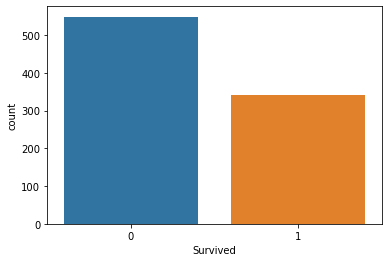

In [6]:
sns.countplot(df['Survived'])

In [7]:
#Survivors grouped by passenger class
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [8]:
#Survivors grouped by gender
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

columns 'Age','Cabin','Embarked' have null values

# 4.Fill in all the missing values present in all the columns in the dataset

In [10]:
#filled the missing values in column 'Age' with mean value
df['Age'].fillna(df['Age'].median(),inplace=True)
#filled the missing values in column 'Embarked' with the mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
# or 
# import statistics
#df['Embarked'].fillna(statistics.mode(df['Embarked']),inplace=True)

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [11]:
df['Cabin'].nunique()

147

In [12]:
# as the 'cabin' field has 687 missing values out of 891 , delete the column
df.dropna(axis=1,inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5.Check and handle outliers in at least 3 columns in the dataset


<AxesSubplot:xlabel='Age'>

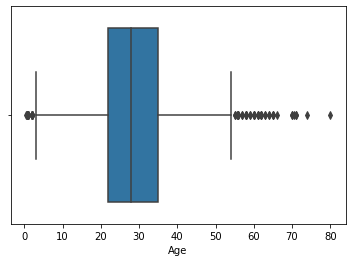

In [13]:
sns.boxplot(df['Age'])

66 outliers found in the age values


Text(0.5, 1.0, "Boxplot of the 'Age' values after treating the outliers")

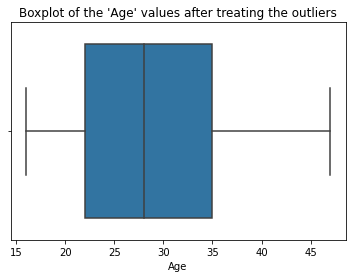

In [14]:
#finding the outliers using the INTER QUATRTILE RANGE

Q1=np.percentile(df['Age'],25,interpolation="midpoint")
Q2=np.percentile(df['Age'],50,interpolation="midpoint")
Q3=np.percentile(df['Age'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df["Age"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the age values")

# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = int(np.percentile(df["Age"], 10))
ninetieth_percentile = int(np.percentile(df["Age"], 90))

# the values lesser than 10th percentile are replaced with 10th percentile value
df['Age'] = np.where(df['Age']<tenth_percentile, tenth_percentile, df['Age'])

# the values above 90th percentile are replaced with 90th percentile value
df['Age'] = np.where(df['Age']>ninetieth_percentile, ninetieth_percentile, df['Age'])

sns.boxplot(df['Age'])
plt.title("Boxplot of the 'Age' values after treating the outliers")

<AxesSubplot:xlabel='Age', ylabel='Density'>

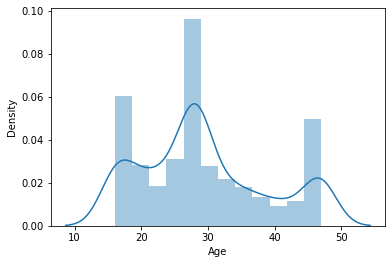

In [15]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare'>

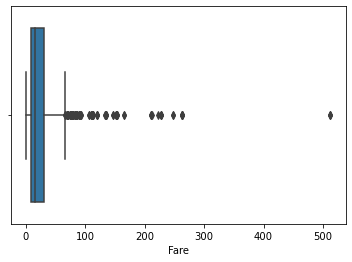

In [16]:
sns.boxplot(df['Fare'])

116 outliers found in the Fare values


Text(0.5, 1.0, "Boxplot of the 'Fare' values after treating the outliers")

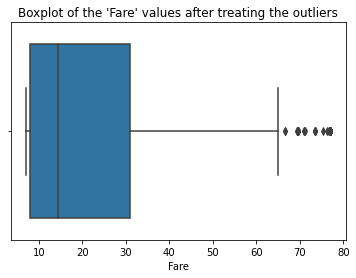

In [17]:
#finding the outliers using the INTER QUATRTILE RANGE

Q1=np.percentile(df['Fare'],25,interpolation="midpoint")
Q2=np.percentile(df['Fare'],50,interpolation="midpoint")
Q3=np.percentile(df['Fare'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df["Fare"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the Fare values")
 
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = int(np.percentile(df["Fare"], 10))
ninetieth_percentile = int(np.percentile(df["Fare"], 90))

# the values lesser than 10th percentile are replaced with 10th percentile value
df['Fare'] = np.where(df['Fare']<tenth_percentile, tenth_percentile, df['Fare'])

# the values above 90th percentile are replaced with 90th percentile value
df['Fare'] = np.where(df['Fare']>ninetieth_percentile, ninetieth_percentile, df['Fare'])

sns.boxplot(df['Fare'])
plt.title("Boxplot of the 'Fare' values after treating the outliers")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

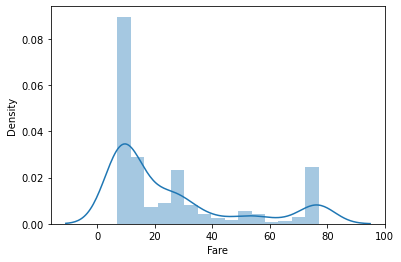

In [18]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='SibSp'>

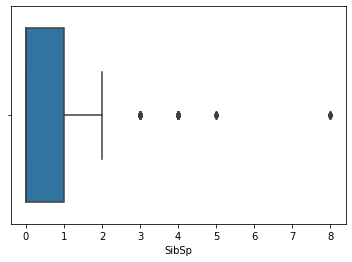

In [19]:
sns.boxplot(df['SibSp'])

46 outliers found in the SibSp values
0.5230078563411896


Text(0.5, 1.0, "Boxplot of the 'SibSp' values after treating the outliers")

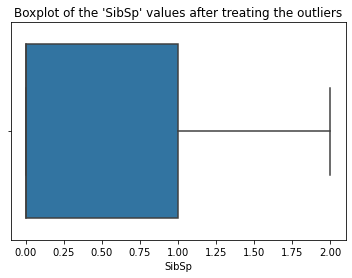

In [20]:
#finding the outliers using the INTER QUATRTILE RANGE

Q1=np.percentile(df['SibSp'],25,interpolation="midpoint")
Q2=np.percentile(df['SibSp'],50,interpolation="midpoint")
Q3=np.percentile(df['SibSp'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df["SibSp"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)
print(len(outlier), "outliers found in the SibSp values")

mean_Sib = np.mean(df['SibSp'])# Replace with mean
print(mean_Sib)
#outliers are replaced with mean value
for i in outlier:
    df['SibSp'] = np.where(df['SibSp']==i, int(mean_Sib), df['SibSp'])
    
sns.boxplot(df['SibSp'])
plt.title("Boxplot of the 'SibSp' values after treating the outliers")

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

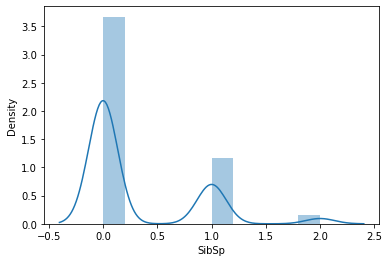

In [21]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Pclass'>

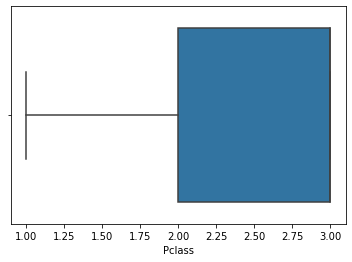

In [22]:
sns.boxplot(df['Pclass'])

No outliers are found in 'Pclass' values

# 6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [23]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [24]:
y=df['Survived']
x=df.drop(['Survived','Name','Sex','Embarked','Ticket'],axis=1)
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.359708,0.297419,0.381594,25.511667
std,0.836071,9.487986,0.521648,0.806057,23.197269
min,1.000000,16.000000,0.000000,0.000000,7.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,47.000000,2.000000,6.000000,77.000000


In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
survived=df['Survived'].values.reshape(-1,1)
df_norm = pd.DataFrame(scaler.fit_transform(survived))
df['Survived']=df_norm
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)
print(y_test)


PassengerId
710    1
440    0
841    0
721    1
40     1
      ..
434    0
774    0
26     1
85     1
11     1
Name: Survived, Length: 179, dtype: int64


In [28]:

# evaluate the model using Mean squared error and R squared value
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,prediction))

from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,prediction))

print("This model is a best fit for our data, as the MSE and r2_score value is small.")

MSE is: 0.1869867680484928
R squared value is: 0.22892625031637603
This model is a best fit for our data, as the MSE and r2_score value is small.
